In [1]:
import numpy as np
import pandas as pd
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph
from pgmpy.inference import BeliefPropagation

## Task 2 

### Task 2.1

In [2]:
G = FactorGraph() ## Create FactorGraph object
###############################
#   TODO: Define factor functions
###############################
f_1 = DiscreteFactor(['S1'], [2], [.85, .15])
f_2 = DiscreteFactor(['S1', 'E1'], [2, 2], [.1, .2, .0, .5])

In [3]:
###############################
#   TODO: Add random variables
#         and factor functions 
###############################
G.add_nodes_from(['S1', 'E1'])  ## Add random variables 
G.add_factors(f_1, f_2)         ## Add factor functions

###############################
#   TODO: Add the edges for random 
#   variables and factor functions
###############################
G.add_edges_from([('S1', f_1), ('S1', f_2), ('E1', f_2)])

### Task 2.2

In [4]:
bp = BeliefPropagation(G)
###############################
#   TODO: Compute the marginal probability
###############################
margin = bp.query(variables=['S1'], joint=False, show_progress=False)
print(margin['S1'])

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.7727 |
+-------+-----------+
| S1(1) |    0.2273 |
+-------+-----------+


### Task 2.3

$
\text{According to our results in Task 2.2, $S_1=0$ maximizes the marginal probability $P(S_1)$.}
$

### Task 2.4

In [5]:
margin = bp.query(variables=['S1'], evidence={'E1': 1}, joint=False, show_progress=False)
print(margin['S1'])

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.6939 |
+-------+-----------+
| S1(1) |    0.3061 |
+-------+-----------+


### Task 2.5

$
\text{The most probable state of $S_1$ when observing $E_1=1$ is still $0$.}
$

### Task 2.6

## Task 3

In [6]:
ATTACK_EVENTS_MAP = {
    'Scan':1,
    'Login':2,
    'Sensitive_URI':3,
    'New_Kernel_Module':4,
    'DNS_Tunneling':5
}
ATTACK_STATES_MAP = {
    'benign': 1,
    'discovery': 2,
    'access': 3,
    'lateral_movement': 4,
    'privilege_escalation': 5,
    'persistence': 6,
    'defense_evasion': 7,
    'collection': 8,
    'exfiltration': 9,
    'command_control': 10,
    'execution': 11
}

### Task 3.0 

In [7]:
event_review = open('event_review.txt', 'r') 
Lines = event_review.readlines() 

# matrix for all the fs
f_gen=np.zeros((5,11))

for line in Lines: 
    temp = line.split(" //")
    # get the event
    temp[0] = temp[0][7:]
    # get the state
    temp[1] = temp[1].strip('/')
    temp[1] = temp[1].strip('\n')
    temp[1] = temp[1][21:]
    temp[1] = temp[1].strip(" ")
    f_gen[ATTACK_EVENTS_MAP[temp[0]]-1,ATTACK_STATES_MAP[temp[1]]-1] += 1.0

for i in range(5):
    f_gen[i,:]=f_gen[i,:]/f_gen[i,:].sum()

# construct the corresponding factor function for each event
f_event = {}
for key in ATTACK_EVENTS_MAP:
    f_event[key] = f_gen[ATTACK_EVENTS_MAP[key]-1, :]
    
print('The corresponding factor function for each event:')
f_events = []
for key in f_event:
    f_events.append(f_event[key])

# generate a better format
pd_f_events = pd.DataFrame(f_events, columns=ATTACK_STATES_MAP.keys(), index=ATTACK_EVENTS_MAP.keys())
pd_f_events

The corresponding factor function for each event:


,benign,discovery,access,lateral_movement,privilege_escalation,persistence,defense_evasion,collection,exfiltration,command_control,execution
Scan,0.936000,0.064,0.0,0.0,0.000000,0.000,0.0,0.0,0.00,0.0,0.0
Login,1.000000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.00,0.0,0.0
Sensitive_URI,0.553333,0.000,0.0,0.0,0.446667,0.000,0.0,0.0,0.00,0.0,0.0
New_Kernel_Module,0.875000,0.000,0.0,0.0,0.000000,0.125,0.0,0.0,0.00,0.0,0.0
DNS_Tunneling,0.020000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.98,0.0,0.0


In [8]:
print('f1 to f9')
# a list for the observed event
event_list = ['Scan', 'Login', 'Sensitive_URI', 'Sensitive_URI', 'Sensitive_URI', 'New_Kernel_Module', 'DNS_Tunneling', 'DNS_Tunneling', 'DNS_Tunneling']
# get f1 to f9
f_functions = []
for i in range(len(event_list)):
    f_functions.append(f_event[event_list[i]])
    
# generate a better format
pd_f_functions = pd.DataFrame(f_functions, columns=ATTACK_STATES_MAP.keys(), index=['f'+str(i+1) for i in range(9)])
pd_f_functions

f1 to f9


,benign,discovery,access,lateral_movement,privilege_escalation,persistence,defense_evasion,collection,exfiltration,command_control,execution
f1,0.936000,0.064,0.0,0.0,0.000000,0.000,0.0,0.0,0.00,0.0,0.0
f2,1.000000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.00,0.0,0.0
f3,0.553333,0.000,0.0,0.0,0.446667,0.000,0.0,0.0,0.00,0.0,0.0
f4,0.553333,0.000,0.0,0.0,0.446667,0.000,0.0,0.0,0.00,0.0,0.0
f5,0.553333,0.000,0.0,0.0,0.446667,0.000,0.0,0.0,0.00,0.0,0.0
f6,0.875000,0.000,0.0,0.0,0.000000,0.125,0.0,0.0,0.00,0.0,0.0
f7,0.020000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.98,0.0,0.0
f8,0.020000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.98,0.0,0.0
f9,0.020000,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.98,0.0,0.0


### Task 3.1

In [9]:
attack_sequences = open('attack_sequences.txt', 'r') 
Lines = attack_sequences.readlines()

In [10]:
# look for the most common event sequence and its probability
pattern={}
total = 0

for line in Lines:
    temp = line.rstrip(' \n').split(" ")
    
    for i in range(len(temp)-2):
        total+=1
        key = temp[i]+'->'+temp[i+1]+'->'+temp[i+2]
        if(key in pattern):
            pattern[key]=pattern[key]+1
        else:
            pattern[key]=1
            
maximum = max(pattern, key=pattern.get)
possibility = pattern[maximum]/total
pd.DataFrame([['Scan->Sensitive_URI->New_Kernel_Module', 'c', 'persistence', possibility]], 
             columns = ['Most Common Event Sequence', 'Factor Function', 'Attack States', 'Probability'],
             index = [''])

,Most Common Event Sequence,Factor Function,Attack States,Probability
,Scan->Sensitive_URI->New_Kernel_Module,c,persistence,0.07148


In [11]:
f_c = np.zeros(11)
f_c[ATTACK_STATES_MAP['persistence']-1] = possibility

print('Commonality factor function c:')
pd.DataFrame(f_c.reshape(1,11), columns=ATTACK_STATES_MAP.keys(), index=['fc'])

Commonality factor function c:


,benign,discovery,access,lateral_movement,privilege_escalation,persistence,defense_evasion,collection,exfiltration,command_control,execution
fc,0.0,0.0,0.0,0.0,0.0,0.07148,0.0,0.0,0.0,0.0,0.0


In [12]:
# look for the most frequent repetitive event sequence and its probability
patternr={}

for line in Lines:
    temp = line.rstrip(' \n').split(" ")
    
    for i in range(len(temp)-2):
        if(temp[i]==temp[i+1] and temp[i+2]==temp[i+1]):
            key = temp[i]+'->'+temp[i+1]+'->'+temp[i+2]
            if(key in patternr):
                patternr[key]=patternr[key]+1
            else:
                patternr[key]=1
                
maximumr = max(patternr, key=patternr.get)
possibilityr = patternr[maximumr]/total
pd.DataFrame([['Sensitive_URI->Sensitive_URI->Sensitive_URI', 'r', 'privilege escalation', possibilityr]], 
             columns = ['Most Frequent Repetitive Event Sequence', 'Factor Function', 'Attack States', 'Probability'],
             index = [''])

,Most Frequent Repetitive Event Sequence,Factor Function,Attack States,Probability
,Sensitive_URI->Sensitive_URI->Sensitive_URI,r,privilege escalation,0.066476


In [13]:
f_r = np.zeros(11)
f_r[ATTACK_STATES_MAP['privilege_escalation']-1] = possibilityr

print('Repetitiveness factor function r:')
pd.DataFrame(f_r.reshape(1,11), columns=ATTACK_STATES_MAP.keys(), index=['fr'])

Repetitiveness factor function r:


,benign,discovery,access,lateral_movement,privilege_escalation,persistence,defense_evasion,collection,exfiltration,command_control,execution
fr,0.0,0.0,0.0,0.0,0.066476,0.0,0.0,0.0,0.0,0.0,0.0


### Task 3.2  You will have to submit the graph you draw through Compass

### Task 3.3

In [14]:
# since the total factor graph has five disconnected parts
# we plan to build five independent factor graphs to represent the entire factor graph

## Create FactorGraph object
G1 = FactorGraph() # for e1, e3, e4, e5, e6, s1, s3, s4, s5, s6
G2 = FactorGraph() # for e2, s2
G3 = FactorGraph() # for e7, s7
G4 = FactorGraph() # for e8, s8
G5 = FactorGraph() # for e9, s9

###############################
#   TODO: Define factor functions
###############################

# for G1
f_1_1 = DiscreteFactor(['E1', 'S1'], [1,11], f_event[event_list[1-1]])
f_1_3 = DiscreteFactor(['E3', 'S3'], [1,11], f_event[event_list[3-1]])
f_1_4 = DiscreteFactor(['E4', 'S4'], [1,11], f_event[event_list[4-1]])
f_1_5 = DiscreteFactor(['E5', 'S5'], [1,11], f_event[event_list[5-1]])
f_1_6 = DiscreteFactor(['E6', 'S6'], [1,11], f_event[event_list[6-1]])
f_1_c = DiscreteFactor(['E1', 'E3', 'E6', 'S6'], [1, 1, 1, 11], f_c)
f_1_r = DiscreteFactor(['E3', 'E4', 'E5', 'S5'], [1, 1, 1, 11], f_r)

# for G2
f_2_2 = DiscreteFactor(['E2', 'S2'], [1,11], f_event[event_list[2-1]])

# for G3
f_3_7 = DiscreteFactor(['E7', 'S7'], [1,11], f_event[event_list[7-1]])

# for G4
f_4_8 = DiscreteFactor(['E8', 'S8'], [1,11], f_event[event_list[8-1]])

# for G5
f_5_9 = DiscreteFactor(['E9', 'S9'], [1,11], f_event[event_list[9-1]])

###############################
#   TODO: Add random variables
#         and factor functions 
###############################

# for G1
G1.add_nodes_from(['E1', 'E3', 'E4', 'E5', 'E6', 'S1', 'S3', 'S4', 'S5', 'S6'])  ## Add random variables 
G1.add_factors(f_1_1, f_1_3, f_1_4, f_1_5, f_1_6, f_1_c, f_1_r)                  ## Add factor functions

# for G2
G2.add_nodes_from(['E2', 'S2'])
G2.add_factors(f_2_2)

# for G3
G3.add_nodes_from(['E7', 'S7'])
G3.add_factors(f_3_7)

# for G4
G4.add_nodes_from(['E8', 'S8'])
G4.add_factors(f_4_8)

# for G5
G5.add_nodes_from(['E9', 'S9'])
G5.add_factors(f_5_9)

###############################
#   TODO: Add the edges for random 
#   variables and factor functions
###############################

# for G1
G1.add_edges_from([('E1',f_1_1),('S1',f_1_1),('E3',f_1_3),('S3',f_1_3),('E4',f_1_4),('S4',f_1_4),('E5',f_1_5),('S5',f_1_5),('E6',f_1_6),('S6',f_1_6),('E1',f_1_c),('E3',f_1_c),('E6',f_1_c),('S6',f_1_c),('E3',f_1_r),('E4',f_1_r),('E5',f_1_r),('S5',f_1_r)])

# for G2
G2.add_edges_from([('E2',f_2_2),('S2',f_2_2)])

# for G3
G3.add_edges_from([('E7',f_3_7),('S7',f_3_7)])

# for G4
G4.add_edges_from([('E8',f_4_8),('S8',f_4_8)])

# for G5
G5.add_edges_from([('E9',f_5_9),('S9',f_5_9)])

###############################
#   TODO: Do the inference
###############################

bp1 = BeliefPropagation(G1)
bp2 = BeliefPropagation(G2)
bp3 = BeliefPropagation(G3)
bp4 = BeliefPropagation(G4)
bp5 = BeliefPropagation(G5)

### Task 3.4

#### a. At every time point, provide the marginal probability of each state (Since we have 9 time points and 11 possible states, you should provide 99 probability values here)

In [15]:
# for S1, S3, S4, S5, S6
G1_margin = bp1.query(variables=['S1', 'S3', 'S4', 'S5', 'S6'], joint=False, show_progress=False)
S1_margin = G1_margin['S1']
S3_margin = G1_margin['S3']
S4_margin = G1_margin['S4']
S5_margin = G1_margin['S5']
S6_margin = G1_margin['S6']

# for S2
G2_margin = bp2.query(variables=['S2'], joint=False, show_progress=False)
S2_margin = G2_margin['S2']

# for S7
G3_margin = bp3.query(variables=['S7'], joint=False, show_progress=False)
S7_margin = G3_margin['S7']

# for S8
G4_margin = bp4.query(variables=['S8'], joint=False, show_progress=False)
S8_margin = G4_margin['S8']

# for S9
G5_margin = bp5.query(variables=['S9'], joint=False, show_progress=False)
S9_margin = G5_margin['S9']

S_margin = [S1_margin, S2_margin, S3_margin, S4_margin, S5_margin, S6_margin, S7_margin, S8_margin, S9_margin]

# generate a better forma
S_margin_values = [S1_margin.values, S2_margin.values, S3_margin.values, S4_margin.values, S5_margin.values,
                   S6_margin.values, S7_margin.values, S8_margin.values, S9_margin.values]

pd_S_margin_values = pd.DataFrame(S_margin_values, columns=ATTACK_STATES_MAP.keys(), index=['S'+str(i+1) for i in range(9)])
pd_S_margin_values

,benign,discovery,access,lateral_movement,privilege_escalation,persistence,defense_evasion,collection,exfiltration,command_control,execution
S1,0.936000,0.064,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
S2,1.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
S3,0.553333,0.000,0.0,0.0,0.446667,0.0,0.0,0.0,0.00,0.0,0.0
S4,0.553333,0.000,0.0,0.0,0.446667,0.0,0.0,0.0,0.00,0.0,0.0
S5,0.000000,0.000,0.0,0.0,1.000000,0.0,0.0,0.0,0.00,0.0,0.0
S6,0.000000,0.000,0.0,0.0,0.000000,1.0,0.0,0.0,0.00,0.0,0.0
S7,0.020000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.98,0.0,0.0
S8,0.020000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.98,0.0,0.0
S9,0.020000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.98,0.0,0.0


#### b. At every time point, provide the most probable state

In [16]:
print('The most probable state for each time point')

S_state = []
for i in range(len(S_margin)):
    S_state.append(list(ATTACK_STATES_MAP.keys())[np.where(S_margin[i].values == np.max(S_margin[i].values))[0][0]])
    print('S' + str(i+1) + ":", S_state[i])

The most probable state for each time point
S1: benign
S2: benign
S3: benign
S4: benign
S5: privilege_escalation
S6: persistence
S7: exfiltration
S8: exfiltration
S9: exfiltration


### Task 3.5

In [17]:
ACTIONS = {
    # each value in an actions' vector corresponds to an attack stage
    'NO-OP':   [1.,   0.61, 0.69, 0.09, 0.2 , 0. ,  0.,   0.,   0. ,  0. ,  0.  ],
    'MONITOR': [0.  , 0.39, 0.31 ,0.84, 0.63, 0.7,  0.07 ,0.1 , 0. ,  0. ,  0.  ],
    'STOP':    [0.  , 0.,   0.  , 0.07, 0.17, 0.3,  0.93 ,0.9 , 1. ,  1. ,  1.  ]
}

In [18]:
actions = np.array([ACTIONS['NO-OP'], ACTIONS['MONITOR'], ACTIONS['STOP']])
action_type = ['No-Op Action', 'Monitor Action', 'Stop Attack Action']

print('Recommended action for each time step:')

S_action = []
for i in range(len(S_state)):
    S_action.append(action_type[np.where(actions[:, ATTACK_STATES_MAP[S_state[i]]-1] == np.max(actions[:, ATTACK_STATES_MAP[S_state[i]]-1]))[0][0]])
    print('S' + str(i+1) + ":", S_action[i])

Recommended action for each time step:
S1: No-Op Action
S2: No-Op Action
S3: No-Op Action
S4: No-Op Action
S5: Monitor Action
S6: Monitor Action
S7: Stop Attack Action
S8: Stop Attack Action
S9: Stop Attack Action


### Task 3.6

#### Indicate the earliest stage in which your model should recommend stopping the attack

$
\text{The earliest stage in which our model should recommend stopping the attack is $S_7$, i.e. Exfiltration.}
$

### Task 3.7

In [19]:
# factor graph not including E7 and S7
# since the total factor graph has four disconnected parts
# we plan to build four independent factor graphs to represent the entire factor graph

## Create FactorGraph object
G1 = FactorGraph() # for e1, e3, e4, e5, e6, s1, s3, s4, s5, s6
G2 = FactorGraph() # for e2, s2
# G3 = FactorGraph() # for e7, s7
G4 = FactorGraph() # for e8, s8
G5 = FactorGraph() # for e9, s9

###############################
#   TODO: Define factor functions
###############################

# for G1
f_1_1 = DiscreteFactor(['E1', 'S1'], [1,11], f_event[event_list[1-1]])
f_1_3 = DiscreteFactor(['E3', 'S3'], [1,11], f_event[event_list[3-1]])
f_1_4 = DiscreteFactor(['E4', 'S4'], [1,11], f_event[event_list[4-1]])
f_1_5 = DiscreteFactor(['E5', 'S5'], [1,11], f_event[event_list[5-1]])
f_1_6 = DiscreteFactor(['E6', 'S6'], [1,11], f_event[event_list[6-1]])
f_1_c = DiscreteFactor(['E1', 'E3', 'E6', 'S6'], [1, 1, 1, 11], f_c)
f_1_r = DiscreteFactor(['E3', 'E4', 'E5', 'S5'], [1, 1, 1, 11], f_r)

# for G2
f_2_2 = DiscreteFactor(['E2', 'S2'], [1,11], f_event[event_list[2-1]])

# for G3
# f_3_7 = DiscreteFactor(['E7', 'S7'], [1,11], f_event[event_list[7-1]])

# for G4
f_4_8 = DiscreteFactor(['E8', 'S8'], [1,11], f_event[event_list[8-1]])

# for G5
f_5_9 = DiscreteFactor(['E9', 'S9'], [1,11], f_event[event_list[9-1]])

###############################
#   TODO: Add random variables
#         and factor functions 
###############################

# for G1
G1.add_nodes_from(['E1', 'E3', 'E4', 'E5', 'E6', 'S1', 'S3', 'S4', 'S5', 'S6'])  ## Add random variables 
G1.add_factors(f_1_1, f_1_3, f_1_4, f_1_5, f_1_6, f_1_c, f_1_r)                  ## Add factor functions

# for G2
G2.add_nodes_from(['E2', 'S2'])
G2.add_factors(f_2_2)

# for G3
# G3.add_nodes_from(['E7', 'S7'])
# G3.add_factors(f_3_7)

# for G4
G4.add_nodes_from(['E8', 'S8'])
G4.add_factors(f_4_8)

# for G5
G5.add_nodes_from(['E9', 'S9'])
G5.add_factors(f_5_9)

###############################
#   TODO: Add the edges for random 
#   variables and factor functions
###############################

# for G1
G1.add_edges_from([('E1',f_1_1),('S1',f_1_1),('E3',f_1_3),('S3',f_1_3),('E4',f_1_4),('S4',f_1_4),('E5',f_1_5),('S5',f_1_5),('E6',f_1_6),('S6',f_1_6),('E1',f_1_c),('E3',f_1_c),('E6',f_1_c),('S6',f_1_c),('E3',f_1_r),('E4',f_1_r),('E5',f_1_r),('S5',f_1_r)])

# for G2
G2.add_edges_from([('E2',f_2_2),('S2',f_2_2)])

# for G3
# G3.add_edges_from([('E7',f_3_7),('S7',f_3_7)])

# for G4
G4.add_edges_from([('E8',f_4_8),('S8',f_4_8)])

# for G5
G5.add_edges_from([('E9',f_5_9),('S9',f_5_9)])

###############################
#   TODO: Do the inference
###############################

bp1 = BeliefPropagation(G1)
bp2 = BeliefPropagation(G2)
# bp3 = BeliefPropagation(G3)
bp4 = BeliefPropagation(G4)
bp5 = BeliefPropagation(G5)

In [20]:
# for S1, S3, S4, S5, S6
G1_margin = bp1.query(variables=['S1', 'S3', 'S4', 'S5', 'S6'], joint=False, show_progress=False)
S1_margin = G1_margin['S1']
S3_margin = G1_margin['S3']
S4_margin = G1_margin['S4']
S5_margin = G1_margin['S5']
S6_margin = G1_margin['S6']

# for S2
G2_margin = bp2.query(variables=['S2'], joint=False, show_progress=False)
S2_margin = G2_margin['S2']

# for S7
# G3_margin = bp3.query(variables=['S7'], joint=False, show_progress=False)
# S7_margin = G3_margin['S7']

# for S8
G4_margin = bp4.query(variables=['S8'], joint=False, show_progress=False)
S8_margin = G4_margin['S8']

# for S9
G5_margin = bp5.query(variables=['S9'], joint=False, show_progress=False)
S9_margin = G5_margin['S9']

# print(S1_margin)
# print(S2_margin)
# print(S3_margin)
# print(S4_margin)
# print(S5_margin)
# print(S6_margin)
# print(S7_margin)
# print(S8_margin)
# print(S9_margin)

S_margin = [S1_margin, S2_margin, S3_margin, S4_margin, S5_margin, S6_margin, 0, S8_margin, S9_margin]

In [21]:
print('The most probable state for each time point')

S_state = []
for i in range(len(S_margin)):
    if i == 6:
        S_state.append(0)
        continue
    S_state.append(list(ATTACK_STATES_MAP.keys())[np.where(S_margin[i].values == np.max(S_margin[i].values))[0][0]])
    print('S' + str(i+1) + ":", S_state[i])

The most probable state for each time point
S1: benign
S2: benign
S3: benign
S4: benign
S5: privilege_escalation
S6: persistence
S8: exfiltration
S9: exfiltration


#### a. Judge whether the most probable states for $s_1-s_6,s_8,s_9$ remain the same as Task3.2

$
\text{The most probable states for $S_1−S_6,S_8,S_9$ remain the same as Task3.2.}
$

#### b. State the reason for your judgement

$
\text{$E_7$ and $S_7$ consist an independent factor graph without any connection with any other four factor graphs, which}\\
\text{means that $S_1-S_6,S_8,S_9$ are independent of $E_7$ and $S_7$. As a result, removing $E_7$ and $S_7$ will not affect}\\ 
\text{the inference for the most probable states for $S_1-S_6,S_8,S_9$.}
$

### Task 3.8

#### a. Draw an HMM model for the attack scenario given the provided states and events.

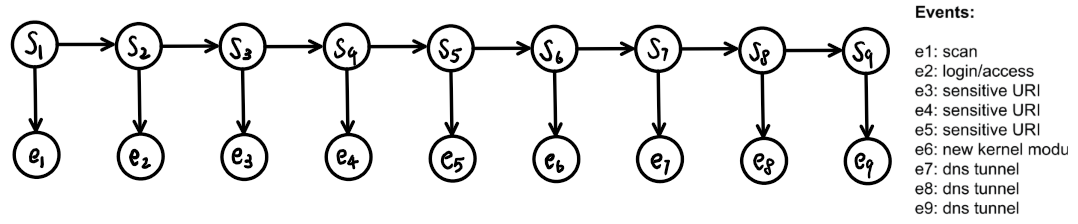

#### b. What parameters are needed for this HMM model to work?

$
\bullet\ \text{An $11\times 11$ state transition probability matrix}\\
\bullet \text{An $11\times 5$ observation matrix}\\
\bullet \text{An $1\times 11$ initial distribution matrix}
$

#### c. Give an example of an advantage of the FG over the HMM model.

$
\text{The FG model can implement more relationships than the HMM model does. Specifically, the HMM model can only implement}\\ 
\text{state transitions and emission of event while the FG model can implement temporal relationships, like patterns of events,}\\ 
\text{as well as statistical relationships, like severity or repetitiveness of events.}
$

## Task 4

### Task 4.0

$
\text{No, it is impossible. Each event has one or more corresponding attack states, so we cannot determine the attack state using only}\\
\text{one event. Besides, each event has the corresponding attack state benign that cannot be determined as an attack, so it is even}\\ 
\text{harder to detect this attack simply using only one event. Thus, it is impossible to $100\%$ detect this attack using only one event.}
$

### Task 4.1

$
\textbf{Scan:}\ \text{This behavior may be done by the antivirus software's, like Windows Defender, automatic scanning of the system to find the virus or attack.}\\
\textbf{Login:}\ \text{This behavior may be done by a friendly remote user, like a coworker of a project, instead of an attacker.}\\
\textbf{Sensitive URI:}\ \text{This behavior may be done by the system admin user who enters a link to download some executable files.}\\
\textbf{New Executable File:}\ \text{The file may come from a safe source like an admin user's compilation of a self-written C program.}\\
\textbf{Homepage overwritten with a new link:}\ \text{The homepage overwritten can be a situation where a benign server's original homepage is broken}\\
\text{for some reasons, and the admin of the server chooses to re-guide the visitor to a new homepage.}\\
\textbf{Webserver restarted:}\ \text{This behavior can be done by the admin user of the system, for example, the Internet connection is broken while}\\
\text{visiting the web, the admin user has to restart the websever to continue when the connection is recovered.}
$

### Task 4.2

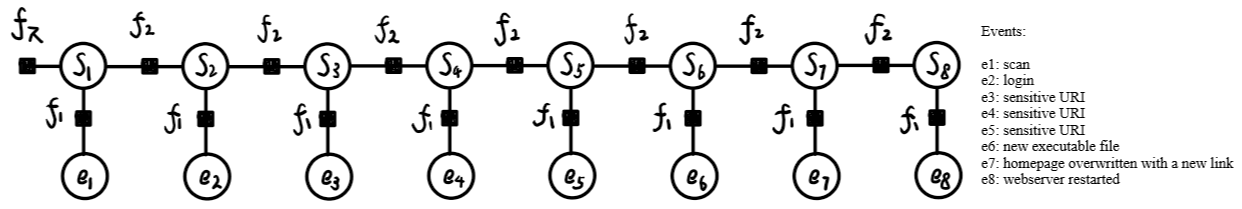

$
\text{Since the attack process is progressive, we believe that there should be state transition relationship between states.}\\ 
\text{As a result, we decide to use a HMM-like factor graph to model this attack. Specifically,}\\
\bullet S_i \in \{\mbox{benign}, \mbox{discovery}, \mbox{privilege escalation}, \mbox{persistence}, \mbox{command and control}, \mbox{execution}\},\ i=1,2,3,4,5,6,7,8\\
\bullet f_{\pi}\ \text{captures the prior probabilities for the states, i.e. implementing initial state distribution in the FG}\\
\bullet f_1\ \text{captures the affinity between observations and states, i.e. implementing observation matrix in the FG}\\
\bullet f_2\ \text{captures the affinity between consecutive states, i.e. implementing state transition probability matrix in the FG}
$

### Task 4.3

$
\text{Both the factor graph in Task 3 and our factor graph in Task 4.2 have variables state and event. However, variable state has $9$}\\
\text{variates in the factor graph in Task 3 while $8$ variates in our factor graph in Task 4.2. Similarly, variable event has $9$}\\
\text{variates in the factor graph in Task 3 while $8$ variates in our factor graph in Task 4.2. Besides, variable state can take $11$}\\ 
\text{values in the factor graph in Task 3 while $6$ values in our factor graph in Task 4.2. Variable event can take $5$ values in the}\\
\text{factor graph in Task 3 while $6$ values in our factor graph in Task 4.2. What's more, events scan, login, and sensitive URI are}\\
\text{common to both factor graphs. States benign, discovery, privilege escalation, persistence, command and control, and execution are}\\ 
\text{common to both factor graphs. Since we choose to use a HMM-like factor function to model this attack, there is no common factor}\\
\text{function to both factor graphs.}
$